In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.impute import SimpleImputer

# 1) Sarima Model Optimization

## 1.1) Cleaning the Data

In [38]:
prices_df = pd.read_csv('../data/bitcoinprice_api.csv')
prices_df.columns = ['date', 'price']
prices_df = prices_df.set_index('date')

In [46]:
sentiment_df = pd.read_csv('../data/augmento_scores_df.csv')
sentiment_df = sentiment_df.set_index('datetime')
sentiment_df = sentiment_df[['BTC_score','twitter_score','reddit_score']]
sentiment_df['twitter_score'] = sentiment_df['twitter_score'].replace(np.nan, np.mean(sentiment_df['twitter_score']))

In [51]:
model_df = pd.merge(prices_df,sentiment_df, left_index=True, right_index=True)
model_df.to_csv('../data/prices_scores_clean.csv')

## 1.2) Viualizing Price Fluctuation and Score Fluctuation

<AxesSubplot:>

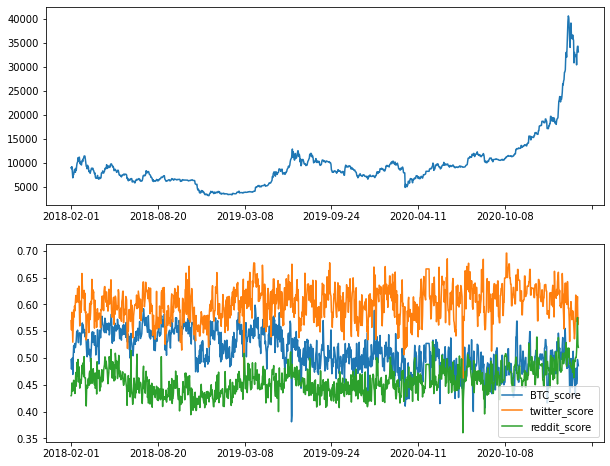

In [65]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
model_df['price'].plot(ax = ax[0])
model_df[['BTC_score','twitter_score','reddit_score']].plot(ax = ax[1])

## 1.3) AD Fuller Test

In [75]:
result = adfuller(model_df['price'].diff(1).dropna())
result[1]

1.86531881608326e-08

<AxesSubplot:>

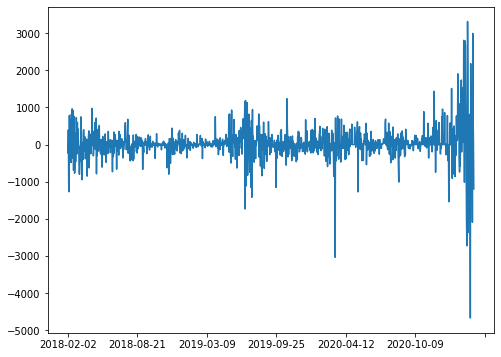

In [73]:
df_stationary = model_df['price'].diff().dropna()
df_stationary.plot(figsize=(8,6))